In [2]:
import seaborn as sns
import numpy as np 
import pandas as pd 
import scipy.stats as stats
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelEncoder
from pylab import rcParams
import warnings
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
warnings.filterwarnings("ignore")

In [3]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [4]:
df=sns.load_dataset('diamonds')
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [5]:
df.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [6]:
df.duplicated().sum()

np.int64(146)

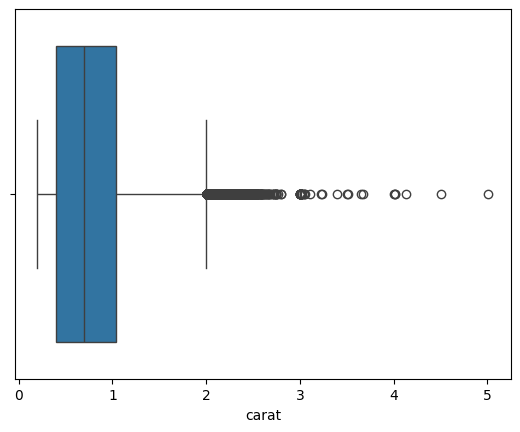

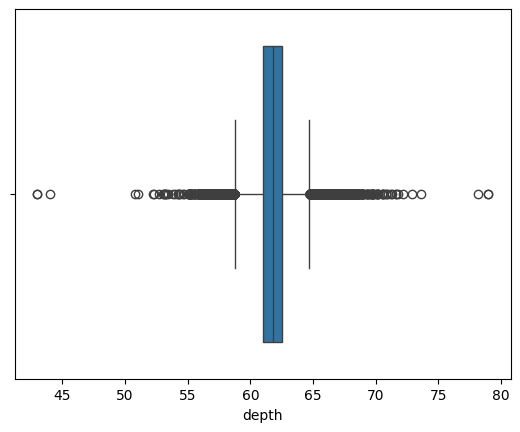

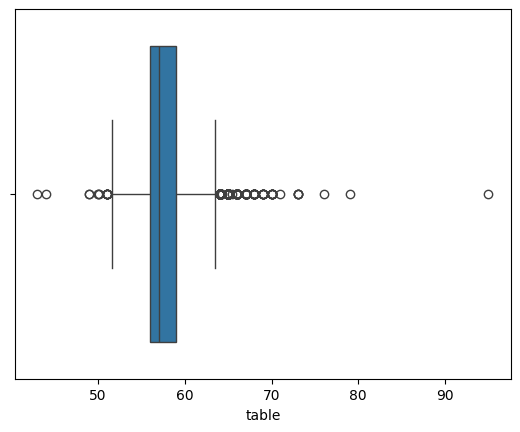

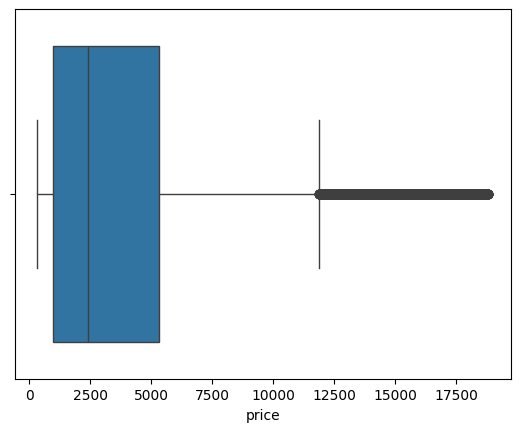

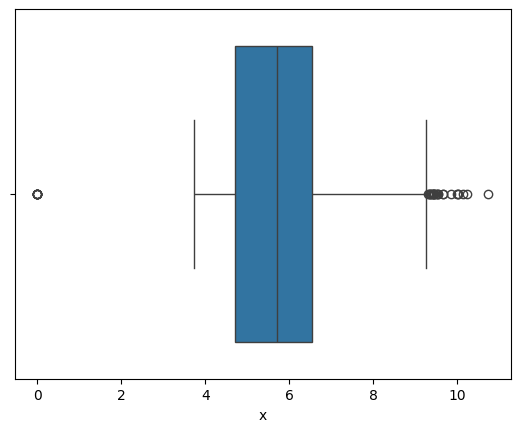

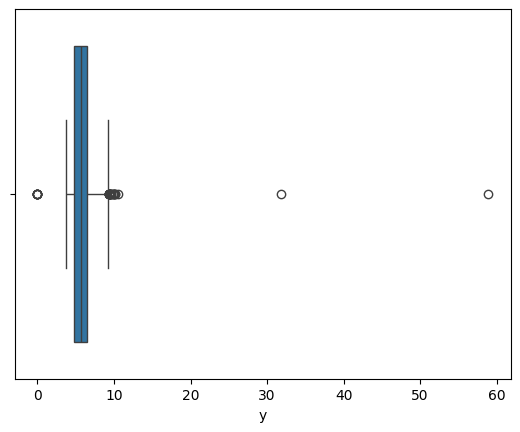

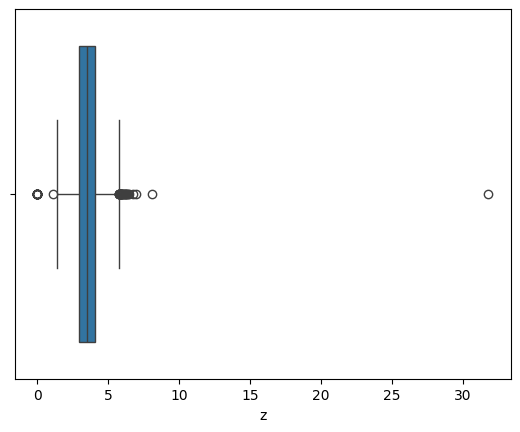

In [7]:
for i in df.select_dtypes(include=np.number).columns:
    sns.boxplot(x=df[i])        
    plt.show()

In [8]:
def clip_outliers(df):       #holl data sets clip
    for col in df.select_dtypes(include=np.number):  # Apply only to numeric columns
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df[col] = df[col].clip(lower_bound, upper_bound)
    return df

# Apply the function
df = clip_outliers(df)
print(df)

       carat        cut color clarity  depth  table   price     x     y     z
0       0.23      Ideal     E     SI2  61.50   55.0   326.0  3.95  3.98  2.43
1       0.21    Premium     E     SI1  59.80   61.0   326.0  3.89  3.84  2.31
2       0.23       Good     E     VS1  58.75   63.5   327.0  4.05  4.07  2.31
3       0.29    Premium     I     VS2  62.40   58.0   334.0  4.20  4.23  2.63
4       0.31       Good     J     SI2  63.30   58.0   335.0  4.34  4.35  2.75
...      ...        ...   ...     ...    ...    ...     ...   ...   ...   ...
53935   0.72      Ideal     D     SI1  60.80   57.0  2757.0  5.75  5.76  3.50
53936   0.72       Good     D     SI1  63.10   55.0  2757.0  5.69  5.75  3.61
53937   0.70  Very Good     D     SI1  62.80   60.0  2757.0  5.66  5.68  3.56
53938   0.86    Premium     H     SI2  61.00   58.0  2757.0  6.15  6.12  3.74
53939   0.75      Ideal     D     SI2  62.20   55.0  2757.0  5.83  5.87  3.64

[53940 rows x 10 columns]


In [9]:
df.drop_duplicates()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.50,55.0,326.0,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.80,61.0,326.0,3.89,3.84,2.31
2,0.23,Good,E,VS1,58.75,63.5,327.0,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.40,58.0,334.0,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.30,58.0,335.0,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.80,57.0,2757.0,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.10,55.0,2757.0,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.80,60.0,2757.0,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.00,58.0,2757.0,6.15,6.12,3.74


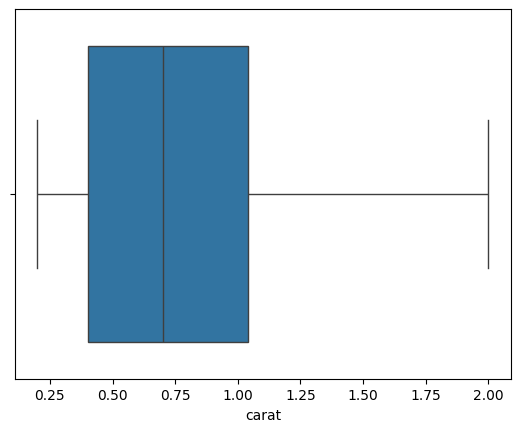

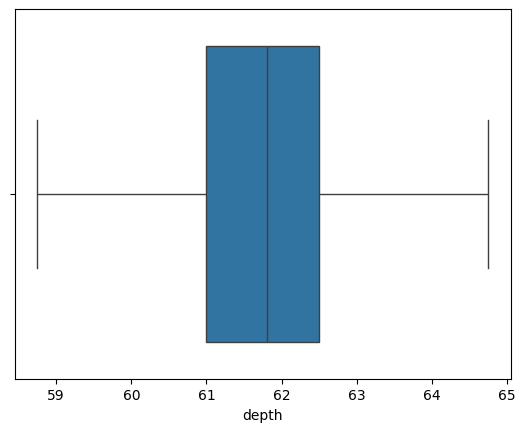

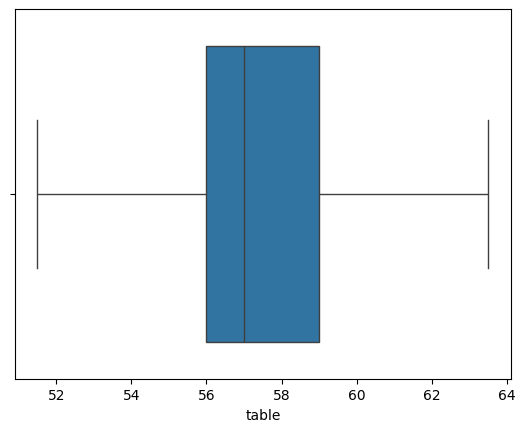

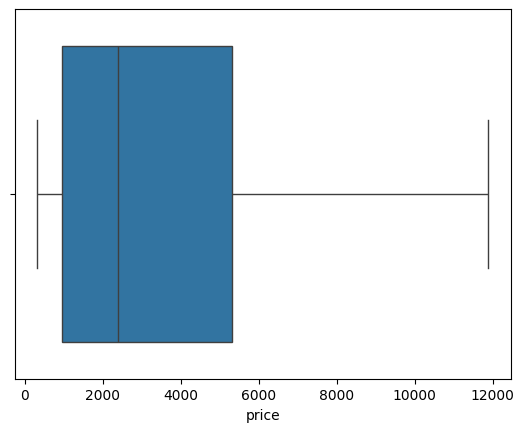

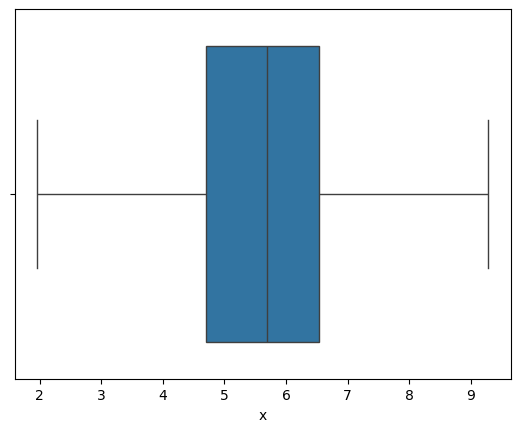

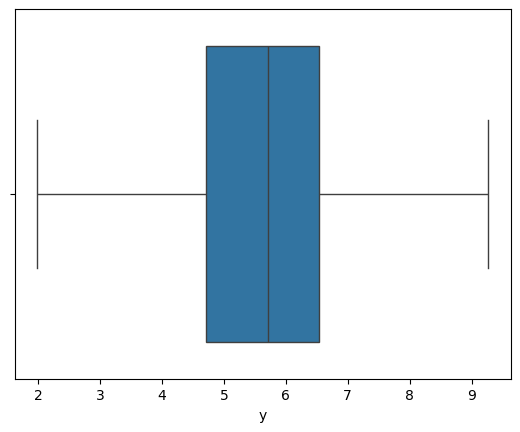

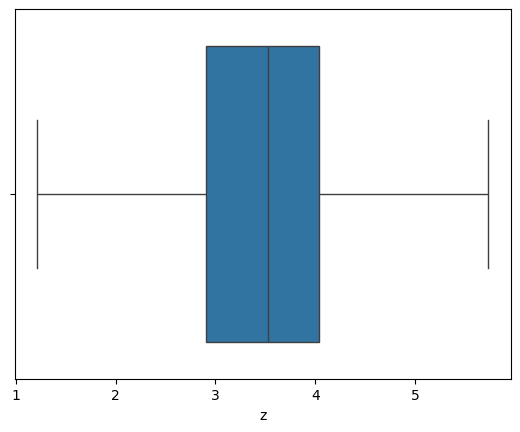

In [10]:
for i in df.select_dtypes(include=np.number).columns:
    sns.boxplot(x=df[i])        
    plt.show()

In [11]:
encoder = LabelEncoder()
df['cut']=df['cut'] = encoder.fit_transform(df['cut'])
df['cut'].value_counts()

cut
2    21551
3    13791
4    12082
1     4906
0     1610
Name: count, dtype: int64

In [12]:
encoder = LabelEncoder()
df['clarity']=df['clarity'] = encoder.fit_transform(df['color'])
df['clarity'].value_counts()

clarity
3    11292
1     9797
2     9542
4     8304
0     6775
5     5422
6     2808
Name: count, dtype: int64

In [13]:
encoder = LabelEncoder()
df['color']=df['color'] = encoder.fit_transform(df['color'])
df['color'].value_counts()

color
3    11292
1     9797
2     9542
4     8304
0     6775
5     5422
6     2808
Name: count, dtype: int64

In [14]:
from sklearn.model_selection import train_test_split
x=df.drop('price',axis=1)
y=df['price']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42) # 42 is best for better accuracy
print("Train set:",x_train.shape,y_train.shape)
print("Test set:",x_test.shape,y_train.shape)

Train set: (43152, 9) (43152,)
Test set: (10788, 9) (43152,)


In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [16]:
# Create and train the regression model
model = LinearRegression()
model.fit(x_train, y_train)

# Predictions
y_pred = model.predict(x_test)

# Model evaluation
print("MAE:",mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

MAE: 731.9698209170455
MSE: 1191366.0015668091
R² Score: 0.8982830823771246


In [17]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [18]:
# Train Decision Tree Refressor
dt_model=DecisionTreeRegressor(random_state=42)
dt_model.fit(x_train,y_train)

dt_pred=dt_model.predict(x_test)
print("Descision Tree Regression")
print("MSE:",mean_absolute_error(y_test,dt_pred))
print("R2 Score:",r2_score(y_test,dt_pred))

Descision Tree Regression
MSE: 672.945464095909
R2 Score: 0.8661952536051702


In [19]:
rf_model=RandomForestRegressor(n_estimators=100,random_state=42)
rf_model.fit(x_train,y_train)

rf_preds=rf_model.predict(x_test)
print("\n Random Forest Performance")
print("MSE:",mean_absolute_error(y_test,rf_preds))
print("R2 Score:",r2_score(y_test,rf_preds))


 Random Forest Performance
MSE: 516.0081110114432
R2 Score: 0.9301492674052435


In [20]:
from sklearn.linear_model import Ridge,Lasso,ElasticNet
from sklearn.metrics import mean_squared_error,r2_score

#Ridge Regression Model 

redge_model=Ridge(alpha=1.0) #Adjust alpha for regulation strenght 
redge_model.fit(x_train,y_train)

redge_preds=redge_model.predict(x_test)
print("\n Rigde Regression Performance")
print("MSE:",mean_absolute_error(y_test,redge_preds))
print("R2 Score:",r2_score(y_test,redge_preds))



 Rigde Regression Performance
MSE: 732.2970397073117
R2 Score: 0.8982696118662983


In [21]:
#Lasso Regression Model 

lasso_model=Lasso(alpha=0.01) #Lasso may need smaller alpha to avoid too much features elimination 
lasso_model.fit(x_train,y_train)

lasso_preds=lasso_model.predict(x_test)
print("\n  Lasso Regression Performance")
print("MSE:",mean_absolute_error(y_test,lasso_preds))
print("R2 Score:",r2_score(y_test,lasso_preds))



  Lasso Regression Performance
MSE: 732.0461021162337
R2 Score: 0.8982688197353318


In [22]:
#ElasticNet Model 

elastic_net__model=ElasticNet(alpha=0.01,l1_ratio=0.5) #l1_ratio=0.5 balance Ridge & Lassa
elastic_net__model.fit(x_train,y_train)

elastic_net_preds=elastic_net__model.predict(x_test)
print("\n  elastic net Regression Performance")
print("MSE:",mean_absolute_error(y_test,elastic_net_preds))
print("R2 Score:",r2_score(y_test,elastic_net_preds))


  elastic net Regression Performance
MSE: 822.1184615750186
R2 Score: 0.8878824386433012


In [23]:
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor
from sklearn.svm import SVR
#import xgboost as xgb
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# Gradient Boosting Regression 

gbr =GradientBoostingRegressor(n_estimators=100,learning_rate=0.1,max_depth=3,random_state=42)
gbr.fit(x_train,y_train)
y_pred_gbr=gbr.predict(x_test)
print("Gradient Boosting RMSE:",np.sqrt(mean_squared_error(y_test,y_pred_gbr)))

Gradient Boosting RMSE: 892.5174083999633


In [24]:
# support vector regression (SVR) Standard dard
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train_scaler=scaler.fit_transform(x_train)
x_test_scaler=scaler.fit_transform(x_test)

svr=SVR(kernel='rbf',C=100,epsilon=0.1)
svr.fit(x_train_scaler,y_train)
y_pred_svr=svr.predict(x_test_scaler)
print("SVR RMSE",np.sqrt(mean_squared_error(y_test,y_pred_svr)))

SVR RMSE 926.432971805951
